# LAB-4: Spatial and Frequency Domain Filters

### Vardan S Kamra (229310100)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Spatial Filtering

Spatial filtering is a technique used to modify or enhance an image by applying a filter (kernel) over it. The filter is a small matrix that moves across the image, performing operations like blurring. Each pixel in the output image is computed using a weighted sum of its neighbors.

In [ ]:
image = cv2.imread("image8.jpg", cv2.IMREAD_GRAYSCALE)

### Average Filter

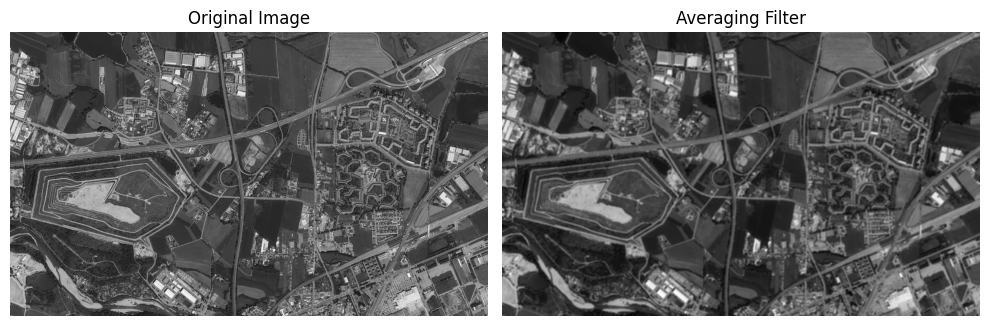

In [ ]:
kernel = np.ones((5, 5), np.float32) / 25 # 5x5 averaging filter
blurred_image = cv2.filter2D(image, -1, kernel) # -1 is depth (same as input image) describes dta type like cv2.CV_8U

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title("Averaging Filter")
plt.axis('off')

plt.tight_layout()
plt.show()

### Weighted Average Filter

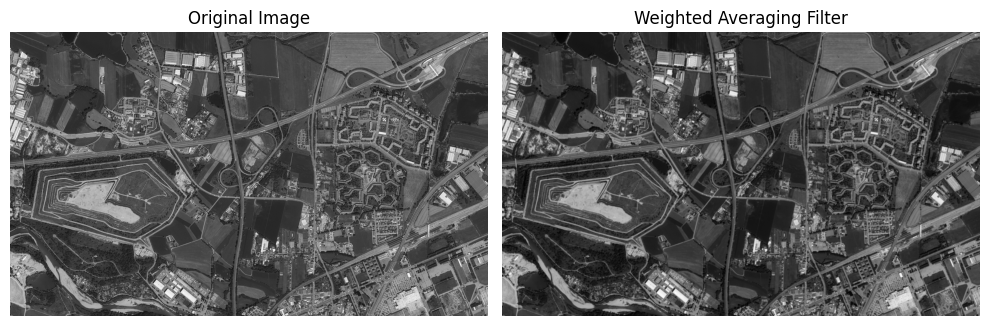

In [ ]:
kernel_weighted = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], np.float32) / 16
weighted_blurred_image = cv2.filter2D(image, -1, kernel_weighted)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(weighted_blurred_image, cmap='gray')
plt.title("Weighted Averaging Filter")
plt.axis('off')

plt.tight_layout()
plt.show()

### Gaussian Filter

Gaussian filter is a weighted average filter where the weights follow the specific Gaussian distribution, meaning pixels closer to the center have higher weights, and the weights decrease as you move away from the center

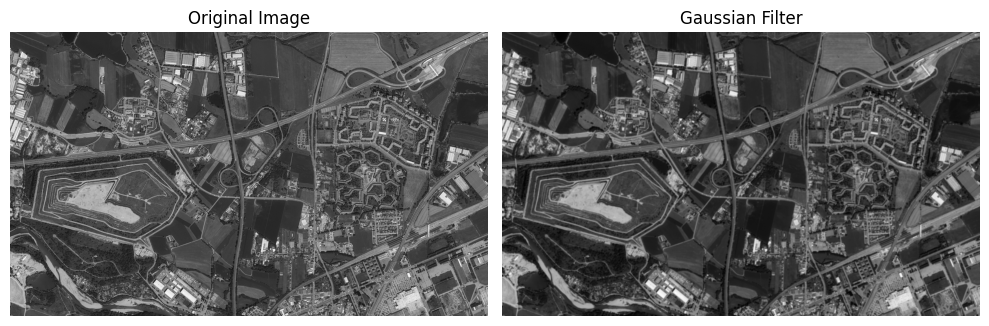

In [ ]:
gaussian_blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gaussian_blurred_image, cmap='gray')
plt.title("Gaussian Filter")
plt.axis('off')

plt.tight_layout()
plt.show()

## Frequency Domain Filtering

Instead of modifying pixel values directly, frequency domain filters work by modifying the image's frequency components. The Fast Fourier Transform (FFT) is used to convert an image into its frequency domain representation.

- Low frequencies correspond to smooth, gradual variations (background and large objects).
- High frequencies correspond to rapid changes (edges, noise, details).

In [ ]:
image = cv2.imread("image7.jpg", cv2.IMREAD_GRAYSCALE)

In [ ]:
# Compute Discrete Fourier Transform
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

### Low Pass Filter

- Removes high-frequency components.
- Keeps smooth transitions and large structures.
- Used for blurring and noise reduction.

Filters are circular in the frequency domain because frequencies are direction-independent (isotropic), and a circular shape ensures that all frequencies within a certain radius are treated equally, making the filtering effect uniform across all directions.

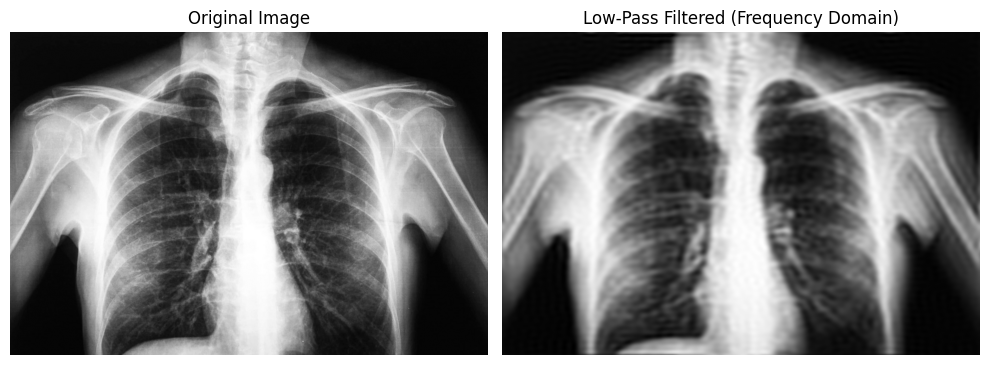

In [ ]:
# Low-Pass Filter Mask (Circular)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), np.uint8)
r = 50  # Radius of LPF
cv2.circle(mask, (ccol, crow), r, 1, -1)

# LPF in Frequency Domain
filtered_dft = dft_shift * mask
filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_dft))
filtered_image = np.abs(filtered_image)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Low-Pass Filtered (Frequency Domain)")
plt.axis('off')

plt.tight_layout()
plt.show()

### High-Pass Filter (HPF)
- Removes low-frequency components.
- Enhances edges and fine details.
- Used for edge detection and sharpening.

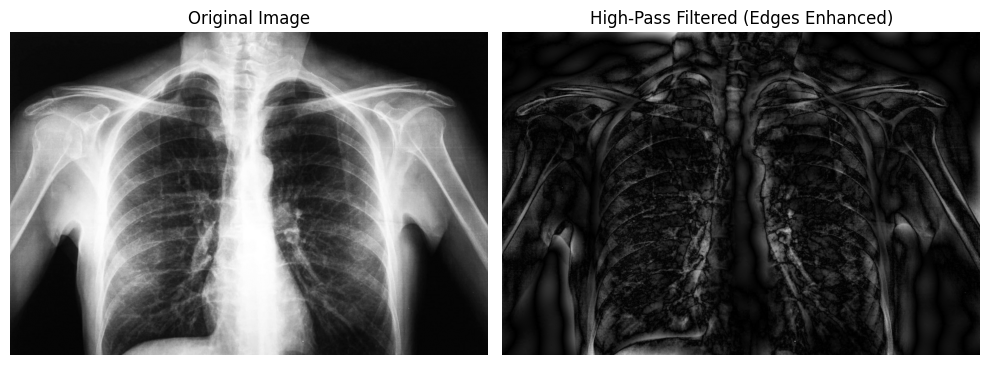

In [ ]:
# High Pass Filter Mask
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
r = 10  # Radius of LPF
mask = np.ones((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), r, 0, -1)  # Invert LPF mask

# Apply HPF in Frequency Domain
filtered_dft = dft_shift * mask
filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_dft))
filtered_image = np.abs(filtered_image)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("High-Pass Filtered (Edges Enhanced)")
plt.axis('off')

plt.tight_layout()
plt.show()